# Confidence interval calculation 

This is an example from the textbook Practical Statistics (Ch2. Box 2.2 p.17-19)

### New packages/functions:

#### Scipy package ___stats___

An overview for the packages in the statistics project package is here
[SciPy](https://docs.scipy.org/doc/scipy/tutorial/stats.html)


The Gaussian (Normal) distribution and random number generators for normally distributed variables are supported by the methods:

- norm.pdf(), the Probability Density Function
- norm.cdf(), the Cumulative Distribution Function
- norm.rvs(), function to create one or more random numbers from a Normal distribution 
- norm.ppf(), The inverse of the CDF (Percent Point Function), finds the x-value for a given probability (P(X>Xcrit). It returns for a given P the Xcrit value)

A close relative of the Gaussian Distributionis the so-called ___t-distribution___! We will use the t-distribution for the calculation of 
more exact confidence intervals in this exercise.

The Scipy package stats has the same functions (methods) available for the t-distribution.

---



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm , t

### The key 'ingredients' for a confidence interval (CI) calculation.


First question you might have is: "_What do I calculate the Confidence Interval for?_"

In our case it is the average (mean) of the samples that we want to calculate. 
The average is an estimate for the true but unknown population mean value.

The value is uncertain because we only have a limited set of observations.

The confidence interval will depend on two characteristical statistical properties of your data:

- sample size (n)
- and the variance in your sample data. 

Finally, the size of the CI ranges will depend on our choice of a confidence interval level (typical values are 90%, 95% or  99% level).




In [7]:
# data
x= np.array([8,12,10,7,7,11,8])
n= np.size(x)

In [8]:
m=np.mean(x)
s=np.std(x)
n=x.size # or we can use n=len(x)
print ("Summary statistics:")
print (40*"-")
print ("sample size n = "+str(n))
print ("mean(x)="+str(round(m,3))+",  stddev(x)= "+str(round(s,3)))



Summary statistics:
----------------------------------------
sample size n = 7
mean(x)=9.0,  stddev(x)= 1.852


In [9]:
# example for fstring use
print ("Summary statistics: mean(x)="+str(round(m,3))+",  stddev(x)= "+str(round(s,3)))
print (f"sample size n = {n}")

Summary statistics: mean(x)=9.0,  stddev(x)= 1.852
sample size n = 7


In [10]:
se= s/np.sqrt(n)
# here we use formatting options directly appended to the variable se
# se:.3f tells the print functio to represent the float number with three decimals 
# (rounded)
print (f"standard error of the mean: se={se:.3f}")

standard error of the mean: se=0.700


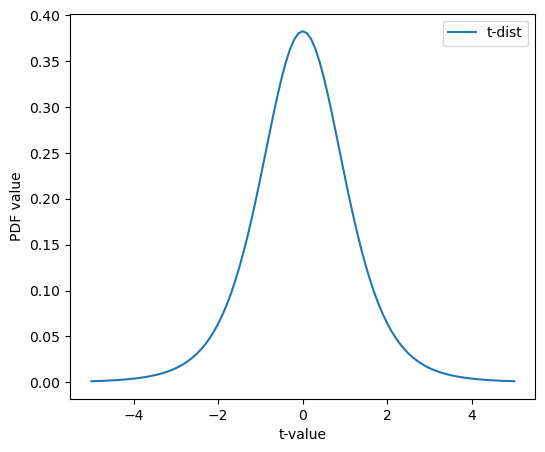

In [11]:
plt.figure(figsize=[6,5])


# define our t-distrbution

df=n-1
xspace=np.arange(-5,5.1,0.1)
f=t.pdf(xspace,df=df)
plt.plot(xspace,f,label='t-dist')
# compare with normal distribution
#plt.plot(xspace,norm.pdf(xspace),label='normal distr.')
plt.xlabel("t-value")
plt.ylabel("PDF value")
plt.legend()
plt.show()


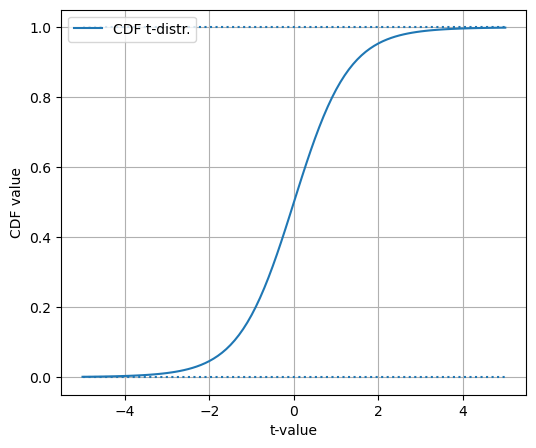

In [12]:
plt.figure(figsize=[6,5])

df=n-1
xspace=np.arange(-5,5.1,0.1)
F=t.cdf(xspace,df)
plt.plot(xspace,F,label="CDF t-distr.")
plt.hlines(0,-5,5,linestyle='dotted')
#plt.hlines(0.5,-5,5,linestyle='dotted')
plt.hlines(1,-5,5,linestyle='dotted')
plt.xlabel("t-value")
plt.ylabel("CDF value")
plt.legend()

plt.grid()
plt.show()


### Interpretation of the Cumulative Density Function (CDF)

#### t-value (we can use R as a generic name for the random variable) is a sampled from a population of real numbers with t-distribution 

#### The probability of R less than -2.5 is given by the returned value of the 
CDF function of the t-distribution.

_prob=t.cdf(-2.5),df)_

In [13]:
t.cdf([-2.5],df)


array([0.02326412])

The Scipy package developers have implemented a function that can return the 
t-values that we need to get the lower and upper bound of the 2.5th and 97.5th quantiles 
in the t-distribution (PDF).

_t.ppf( [0.025,0.975] , df)_

This function call returns an array with 2 values: lower and upper t-value that correspond to the events (a) t value < lower bound value and  (b) t value< upper bound value.


In [9]:
t.ppf([0.025,0.975],df)


array([-2.44691185,  2.44691185])

In [14]:
# 95% confidence interval

ci=se*t.ppf([0.025,0.975],df) 
# ci is array with two values 
# (lower and upper bound of the estimated mean range)

print (f"95 percent confidence interval for the mean {m:.3f}:  ")
lower, upper= m+ci[0], m+ci[1]
print (f"lower to upper boundary: {lower:.3f} - {upper:.3f}")

95 percent confidence interval for the mean 9.000:  
lower to upper boundary: 7.288 - 10.712


---
### References:

- Practical Statistics book (J.Townend), Chapter 2, Box 2.2, p.17-19
- (Collaborative Statistics book, Chapter 8)
